In [2]:
pip install python-docx xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\project333\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\project333\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
import os
import win32com.client
import PyPDF2
import re
import string
from docx import Document
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spacy import displacy
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve,roc_auc_score,classification_report,brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [5]:
#function to read text .doc format

def read_doc_document(doc_path):
    word = win32com.client.Dispatch('Word.Application')       #COM Object Creation
    doc = word.Documents.Open(doc_path)                       #Open Document
    text = doc.Content.Text                                   #Retrieve Text Content
    doc.Close()
    word.Quit()
    return text

In [6]:
# Function to read pdf format 
def read_pdf_document(pdf_path):
    with open(pdf_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = [page.extract_text() for page in pdf_reader.pages]
    return ' '.join(text)

In [7]:
# Function to read .docx format
def read_docx_document(docx_path):
    doc = Document(docx_path)
    text = ' '.join([paragraph.text for paragraph in doc.paragraphs])
    return text

In [8]:
# Extracting SQL Developer Resumes
directory_sql = 'D:\project333\data\SQL Developer Lightning insight'
resumes_data_sql = []
labels_sql = []
for file_name in os.listdir(directory_sql):
    if file_name.endswith('.docx') or file_name.endswith('.doc'):
        file_path = os.path.join(directory_sql, file_name)
        # Extract text from Word document
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)
        elif file_name.endswith('.doc'):
        # Extract text from older Word document (.doc)
            text = read_doc_document(file_path)
        # Append the extracted text and label to the lists
        resumes_data_sql.append(text)
        labels_sql.append('SQL Developer')

In [9]:
# SQL Develper Resume DataFrame
sql_df = pd.DataFrame({'Resumes': resumes_data_sql, 'Category': labels_sql})
sql_df

,Resumes,Category
0,ANIL KUMAR MADDUKURI \t\t SQL & MSBI Develope...,SQL Developer
1,Aradhana Tripathi Current Location: Gachibow...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,\r\r Hyderabad\rNazeer Basha\rSQL and Power...,SQL Developer
5,Resu...,SQL Developer
6,SQL DEVELOPER Name: - Bandi prem sai Willi...,SQL Developer
7,SQL SER...,SQL Developer
8,SQL SER...,SQL Developer
9,RAJU PAVANA KUMARI Professional Summary: Ha...,SQL Developer


In [10]:
# Extracting Peoplesoft Resumes
directory_ps = 'D:\project333\data\Peoplesoft resumes'
resumes_data_ps = []
labels_ps = []
for file_name in os.listdir(directory_ps):
    if file_name.endswith('.docx') or file_name.endswith('.doc'):
        file_path = os.path.join(directory_ps, file_name)
        
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)
        elif file_name.endswith('.doc'):
            text = read_doc_document(file_path)
                
        resumes_data_ps.append(text)
        labels_ps.append('Peoplesoft')

In [11]:
# Peoplesoft Resumes DataFrame
peoplesoft_df = pd.DataFrame({'Resumes': resumes_data_ps, 'Category': labels_ps})
peoplesoft_df

,Resumes,Category
0,Anubhav Kumar Singh\t\t To work in a glob...,Peoplesoft
1,\r\r\r\r\r\r\t\r\rProfile Summary:\t\t\t\t\t\t...,Peoplesoft
2,PeopleSoft Database Administrator\r ...,Peoplesoft
3,Murali Experience Summary I have 6 years of...,Peoplesoft
4,"Priyanka Ramadoss\r61/46, MountPleasant, \rCoo...",Peoplesoft
5,PROFILE SUMMARY I have overall ...,Peoplesoft
6,PEOPLESOFT ADMINISTRATOR\r\r\rSRINIVAS.K \t\t\...,Peoplesoft
7,PeopleSoft Admin VARKALA VIKAS Career Object...,Peoplesoft
8,Vinod Akkala ...,Peoplesoft
9,PeopleSoft Admin/PeopleSoft DBA\r\rGanesh All...,Peoplesoft


In [12]:
# Extracting Workday Resumes
directory_work = 'D:\project333\data\workday resumes'
resumes_data_work = []
labels_work = []
for file_name in os.listdir(directory_work):
    if file_name.endswith('.docx') or file_name.endswith('.doc'):
        file_path = os.path.join(directory_work, file_name)
        
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)
        elif file_name.endswith('.doc'):
            text = read_doc_document(file_path)
                
        resumes_data_work.append(text)
        labels_work.append('Workday')

In [13]:
# Workday Resumes DataFrame
workday_df = pd.DataFrame({'Resumes': resumes_data_work, 'Category': labels_work})
workday_df

,Resumes,Category
0,Chinna Subbarayudu M DOB: 06th March 1994 Nati...,Workday
1,\t Name : Gopi Krishna Reddy \t\t ...,Workday
2,Hari Krishna M\r\r\rSummary:\rA result oriente...,Workday
3,Harikrishna Akula ...,Workday
4,HIMA.MENDU\r \r\rCareer Objective\rTo continu...,Workday
5,...,Workday
6,\t\t\t\t\t\t\tName:\tJ. Sumanth Royal.\r\t\rP...,Workday
7,JYOTI VERMA\t\t\t\t\t 3 years of Experien...,Workday
8,\t\t\t\t\tMadeeswar A\r\t\r\t\rPROFILE SUMMARY...,Workday
9,Mooraboyina Guravaiah Workday Integration Sp...,Workday


In [14]:
# Extracting React Developer Resumes
directory_react = 'D:\project333\data\React Developer'
resumes_data_react = []
labels_react = []
for file_name in os.listdir(directory_react):
    if file_name.endswith('.docx') or file_name.endswith('.doc') or file_name.endswith('.pdf'):
        file_path = os.path.join(directory_react, file_name)
        
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)
        elif file_name.endswith('.doc'):
            text = read_doc_document(file_path)
        elif file_name.endswith('.pdf'):
            text = read_pdf_document(file_path)
                
        resumes_data_react.append(text)
        labels_react.append('React Developer')

In [15]:
# React Developer Resumes DataFrame
react_df = pd.DataFrame({'Resumes': resumes_data_react, 'Category': labels_react})
react_df

,Resumes,Category
0,Kanumuru Deepak Reddy CAREER OBJECTIVE: To...,React Developer
1,HARIPRIYA BATTINA Experience as UI Developer ...,React Developer
2,KAMALAKAR REDDY. A Linked In: https://www.lin...,React Developer
3,Naveen Sadhu Title: software developer\t\t\...,React Developer
4,\r\r PROFILE\rSearching for the opportunity ...,React Developer
5,PRAGNYA PATTNAIK Expertise: Having...,React Developer
6," 204,Sri geethika prestige,road number 10,b...",React Developer
7,\n Thirupathamma Balla SUMMARY: 2.8 year of ...,React Developer
8,Maryala Vinay Reddy\r\rProfessional Summary:\t...,React Developer
9,Ui-Developer/ React JS Developer NAME: KRISH...,React Developer


In [16]:
# Extracting Intern Resumes
directory_intern = 'D:\project333\data\Internship'
resumes_data_intern = []
labels_intern = []
for file_name in os.listdir(directory_intern):
    if file_name.endswith('.docx'):
        file_path = os.path.join(directory_intern, file_name)
        if file_name.endswith('.docx'):
            text = read_docx_document(file_path)        
        resumes_data_intern.append(text)
        labels_intern.append('Internship')

In [17]:
# Intern Resumes DataFrame
intern_df = pd.DataFrame({'Resumes': resumes_data_intern, 'Category': labels_intern})
intern_df

,Resumes,Category
0,Name: Ravali P ...,Internship
1,SUSOVAN BAG Seeking a challenging po...,Internship


In [18]:
# Concatenate all dataframes into one
df = pd.concat([sql_df, peoplesoft_df, workday_df, react_df, intern_df], ignore_index=True)
df

,Resumes,Category
0,ANIL KUMAR MADDUKURI \t\t SQL & MSBI Develope...,SQL Developer
1,Aradhana Tripathi Current Location: Gachibow...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,KAMBALLA PRADEEP ...,SQL Developer
4,\r\r Hyderabad\rNazeer Basha\rSQL and Power...,SQL Developer
...,...,...
74,Pranish Sonone \t Career summary: Exper...,React Developer
75,Ranga Gaganam Having 1+ years of success...,React Developer
76,SHAIK ABDUL SHARUK 2 years’ Experience in W...,React Developer
77,Name: Ravali P ...,Internship


In [19]:
file_path = 'output.csv'
df.to_csv(file_path, index=False)

In [20]:
df1 = df.copy()

In [21]:
# Convert all text to lowercase
df1['Resumes'] = df1['Resumes'].str.lower()
df1

,Resumes,Category
0,anil kumar maddukuri \t\t sql & msbi develope...,SQL Developer
1,aradhana tripathi current location: gachibow...,SQL Developer
2,buddha vamsi ...,SQL Developer
3,kamballa pradeep ...,SQL Developer
4,\r\r hyderabad\rnazeer basha\rsql and power...,SQL Developer
...,...,...
74,pranish sonone \t career summary: exper...,React Developer
75,ranga gaganam having 1+ years of success...,React Developer
76,shaik abdul sharuk 2 years’ experience in w...,React Developer
77,name: ravali p ...,Internship


In [22]:
# Remove leading and trailing whitespaces
df1['Resumes'] = df1['Resumes'].str.strip()

In [23]:
# Removing URLs,mentions,hastags,whitespaces etc
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove RT and CC
    text = re.sub(r'\bRT\b|\bCC\b', '', text, flags=re.MULTILINE)
    # Remove mentions (@username)
    text = re.sub(r'@\S+', '', text, flags=re.MULTILINE)
    # Remove hashtags
    text = re.sub(r'#\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text
df1['Resumes'] = df1['Resumes'].apply(clean_text)
df1

,Resumes,Category
0,anil kumar maddukuri sql msbi developer summar...,SQL Developer
1,aradhana tripathi current location gachibowli ...,SQL Developer
2,buddha vamsi career objective have years of it...,SQL Developer
3,kamballa pradeep synopsis looking forward to a...,SQL Developer
4,hyderabad nazeer basha sql and power bi develo...,SQL Developer
...,...,...
74,pranish sonone career summary experience of ye...,React Developer
75,ranga gaganam having years of successful it ex...,React Developer
76,shaik abdul sharuk years experience in wipro c...,React Developer
77,name ravali p curriculum vitae specialization ...,Internship


In [24]:
# Stopwords removal
nltk.download('stopwords')
# Define the set of stopwords
stop_words = set(stopwords.words('english'))
# Define a function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df1['Resumes'] = df1['Resumes'].apply(remove_stopwords)
df1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imjo6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Resumes,Category
0,anil kumar maddukuri sql msbi developer summar...,SQL Developer
1,aradhana tripathi current location gachibowli ...,SQL Developer
2,buddha vamsi career objective years experience...,SQL Developer
3,kamballa pradeep synopsis looking forward aspi...,SQL Developer
4,hyderabad nazeer basha sql power bi developer ...,SQL Developer
...,...,...
74,pranish sonone career summary experience years...,React Developer
75,ranga gaganam years successful experience phas...,React Developer
76,shaik abdul sharuk years experience wipro care...,React Developer
77,name ravali p curriculum vitae specialization ...,Internship


In [25]:
# Remove Punctuations
# Define a function to remove punctuations
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
df1['Resumes'] = df1['Resumes'].apply(remove_punctuations)
df1

,Resumes,Category
0,anil kumar maddukuri sql msbi developer summar...,SQL Developer
1,aradhana tripathi current location gachibowli ...,SQL Developer
2,buddha vamsi career objective years experience...,SQL Developer
3,kamballa pradeep synopsis looking forward aspi...,SQL Developer
4,hyderabad nazeer basha sql power bi developer ...,SQL Developer
...,...,...
74,pranish sonone career summary experience years...,React Developer
75,ranga gaganam years successful experience phas...,React Developer
76,shaik abdul sharuk years experience wipro care...,React Developer
77,name ravali p curriculum vitae specialization ...,Internship


In [26]:
# Lemmatization
nltk.download('wordnet')
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
# Define a function to perform lemmatization
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
df1['Resumes'] = df1['Resumes'].apply(lemmatize_text)
df1

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imjo6\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Resumes,Category
0,anil kumar maddukuri sql msbi developer summar...,SQL Developer
1,aradhana tripathi current location gachibowli ...,SQL Developer
2,buddha vamsi career objective year experience ...,SQL Developer
3,kamballa pradeep synopsis looking forward aspi...,SQL Developer
4,hyderabad nazeer basha sql power bi developer ...,SQL Developer
...,...,...
74,pranish sonone career summary experience year ...,React Developer
75,ranga gaganam year successful experience phase...,React Developer
76,shaik abdul sharuk year experience wipro caree...,React Developer
77,name ravali p curriculum vitae specialization ...,Internship


In [27]:
# Obtain Resumes column in list format
resumes_list = df1['Resumes'].tolist()
resumes_list

['anil kumar maddukuri sql msbi developer summary year experience m sql server ssms creating ssis package ssrs report using microsoft business intelligence msbi tool expertise various type join sub query writing complex query involving multiple table handled data manipulation data consistency creating view trigger synonym hand experience creation optimization debugging stored procedure function familiar writing query using cte temporary table table variable good experience using set operator like union union except intersect assist required data experience manipulate data multiple table report client using aggregate function window function string function worked extensively data extraction transformation loading etl process sql server integration service used container loop container sequence container load data multiple source file database table expertise using task like data flow task execute sql task control flow task execute package task execute process task bulk insert task send

In [28]:
# Function to extract technical skills from text
def extract_skills(text):
    doc = nlp(text.lower())
    skills = []

    skill_keywords = ['sql','t-sql','sas','python','r','aws','mariadb',
                      'tableau','excel','oracle','mysql','java','html','css','bootstrap',
                      'pig','hive','hbase','impala','scala','database','pl/sql','peoplesoft',
                      'peoplecode','hrms','fscm','crm','cs','hcm','portal','workday','report writer',
                      'calculated fields','react js','json','xml', 'javascript','css3', 'webpack', 'npm',
                      'eib', 'core connector', 'application engine', 'sqr'
                     ]

    for keyword in skill_keywords:
        if keyword in text.lower():
            skills.append(keyword)

    return skills

In [29]:
!pip install spacy

You should consider upgrading via the 'D:\project333\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [30]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 6.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'd:\project333\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [31]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [32]:
df1['Extracted_Skills'] = df1['Resumes'].apply(extract_skills)
df1

,Resumes,Category,Extracted_Skills
0,anil kumar maddukuri sql msbi developer summar...,SQL Developer,"[sql, r, excel, database, cs]"
1,aradhana tripathi current location gachibowli ...,SQL Developer,"[sql, python, r, aws, mariadb, tableau, excel,..."
2,buddha vamsi career objective year experience ...,SQL Developer,"[sql, r, oracle, database, cs]"
3,kamballa pradeep synopsis looking forward aspi...,SQL Developer,"[sql, r, excel, database]"
4,hyderabad nazeer basha sql power bi developer ...,SQL Developer,"[sql, r, excel, database, cs, portal]"
...,...,...,...
74,pranish sonone career summary experience year ...,React Developer,"[r, java, html, cs, portal, javascript]"
75,ranga gaganam year successful experience phase...,React Developer,"[r, java, html, cs, javascript]"
76,shaik abdul sharuk year experience wipro caree...,React Developer,[r]
77,name ravali p curriculum vitae specialization ...,Internship,"[r, java, cs]"


In [33]:
# Tokenization
nltk.download('punkt')
tokens = df1['Resumes'].apply(word_tokenize)
tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imjo6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0     [anil, kumar, maddukuri, sql, msbi, developer,...
1     [aradhana, tripathi, current, location, gachib...
2     [buddha, vamsi, career, objective, year, exper...
3     [kamballa, pradeep, synopsis, looking, forward...
4     [hyderabad, nazeer, basha, sql, power, bi, dev...
                            ...                        
74    [pranish, sonone, career, summary, experience,...
75    [ranga, gaganam, year, successful, experience,...
76    [shaik, abdul, sharuk, year, experience, wipro...
77    [name, ravali, p, curriculum, vitae, specializ...
78    [susovan, bag, seeking, challenging, position,...
Name: Resumes, Length: 79, dtype: object

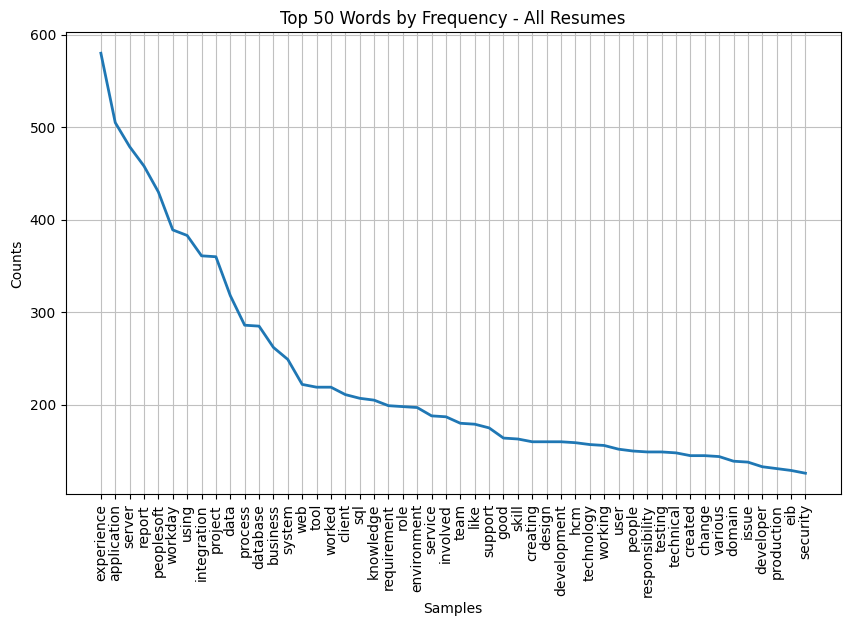

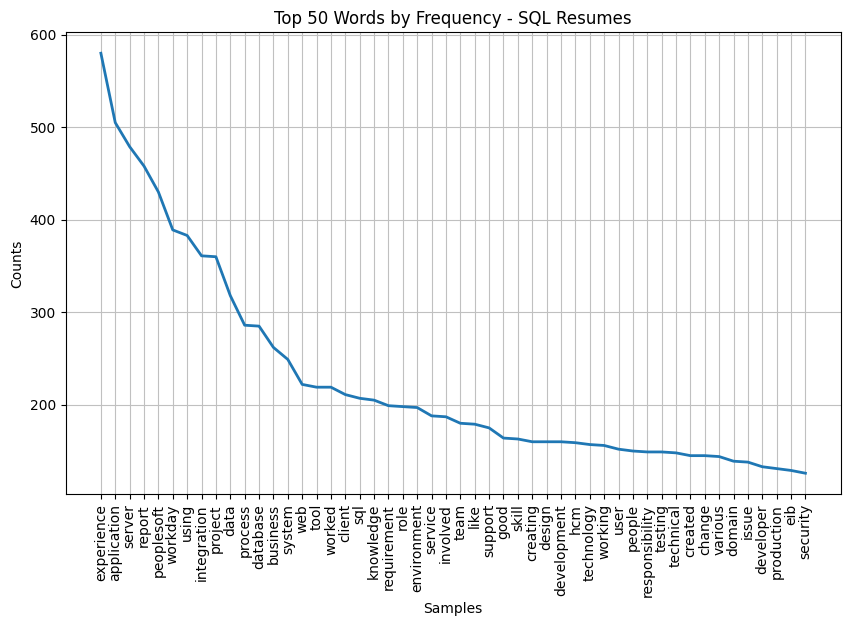

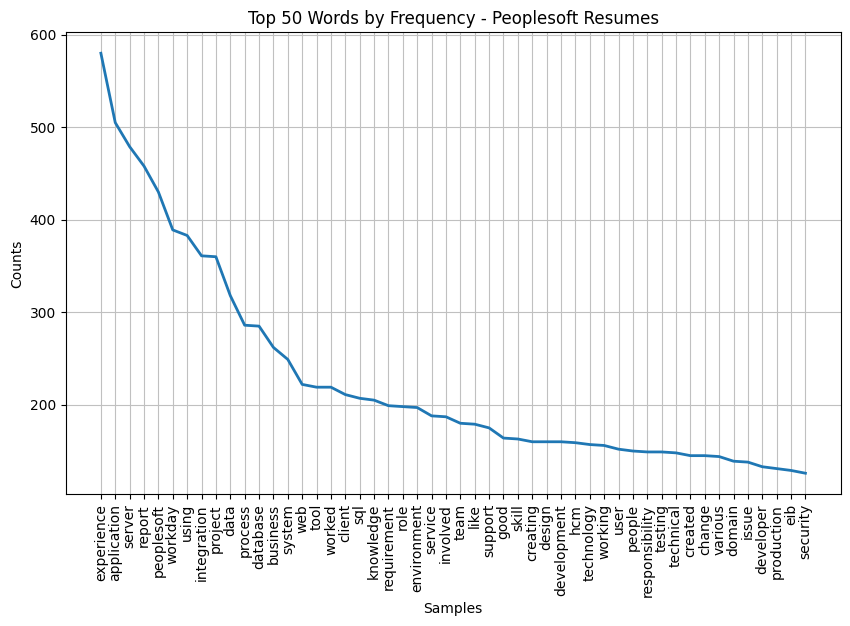

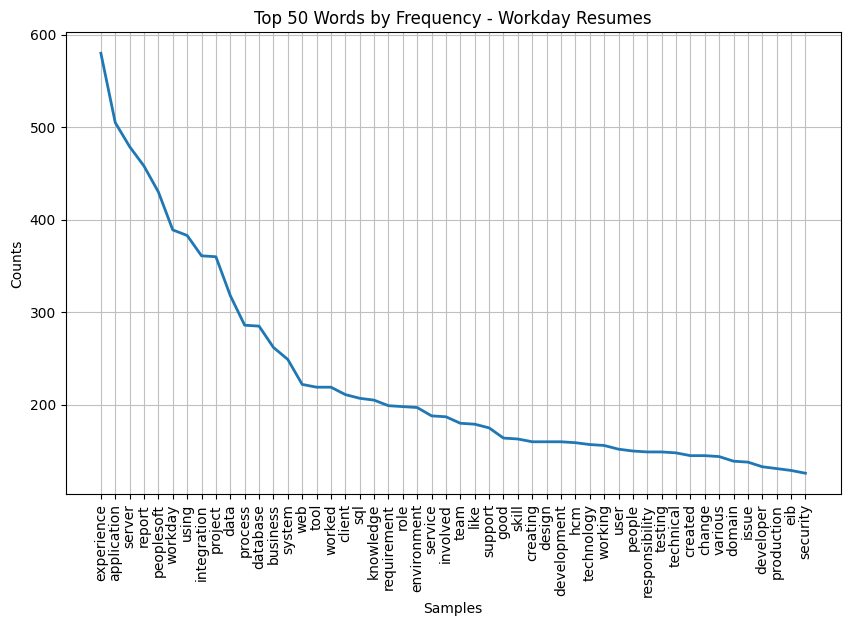

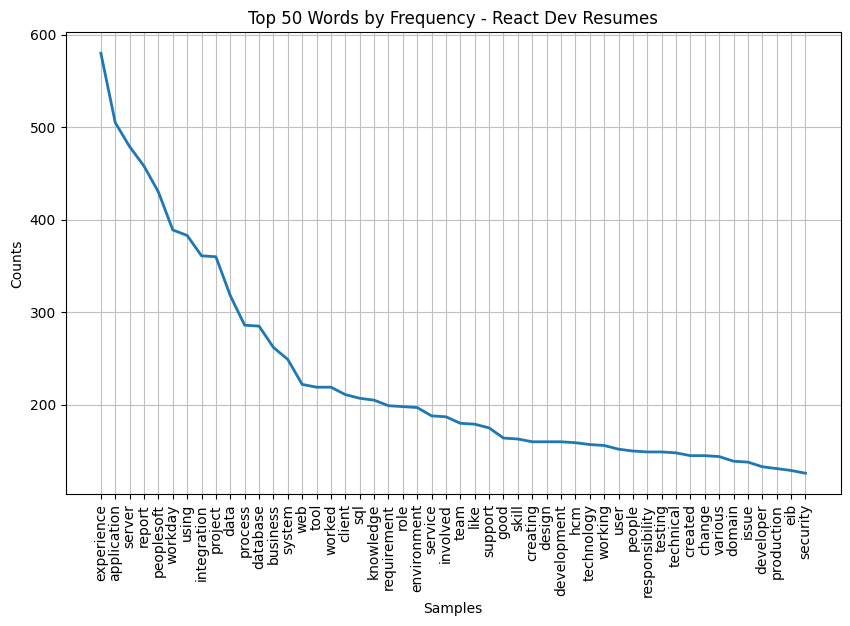

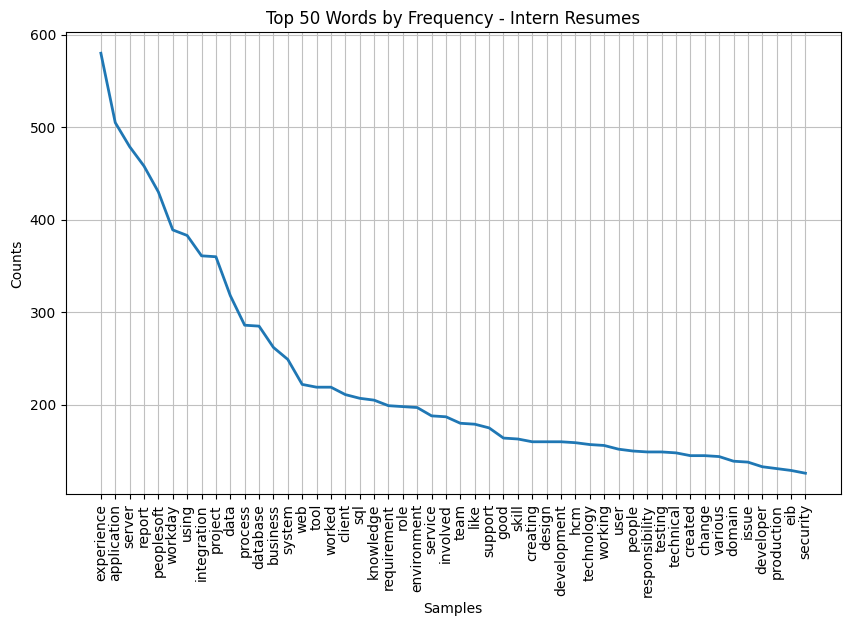

In [34]:
# Word Frequency Analysis
def word_frequency_analysis(dataframe, title):
    # Tokenize each element in the 'Resumes' column using apply
    df1['Tokenized_Resumes'] = df1['Resumes'].apply(lambda x: word_tokenize(x))

    # Flatten the list of lists to get a single list of all tokens
    all_tokens = [token for sublist in df1['Tokenized_Resumes'] for token in sublist]

    # Create a frequency distribution of words
    frequency_distribution = FreqDist(all_tokens)

    # Plot the top N words by frequency
    plt.figure(figsize=(10, 6))
    top_words = 50
    plt.title(f'Top {top_words} Words by Frequency - {title}')
    frequency_distribution.plot(top_words, cumulative=False)
    plt.show()

# Applying the function to each DataFrame
word_frequency_analysis(df1, 'All Resumes')
word_frequency_analysis(sql_df, 'SQL Resumes')
word_frequency_analysis(peoplesoft_df, 'Peoplesoft Resumes')
word_frequency_analysis(workday_df, 'Workday Resumes')
word_frequency_analysis(react_df, 'React Dev Resumes')
word_frequency_analysis(intern_df, 'Intern Resumes')

In [35]:
# Label Encoding 
final_df = df1.copy()
columns_to_drop = ['Extracted_Skills','Tokenized_Resumes']
final_df.drop(columns_to_drop, axis=1, inplace=True)
encoder = LabelEncoder()
final_df['Encoded_Category'] = encoder.fit_transform(final_df['Category'])
final_df

,Resumes,Category,Encoded_Category
0,anil kumar maddukuri sql msbi developer summar...,SQL Developer,3
1,aradhana tripathi current location gachibowli ...,SQL Developer,3
2,buddha vamsi career objective year experience ...,SQL Developer,3
3,kamballa pradeep synopsis looking forward aspi...,SQL Developer,3
4,hyderabad nazeer basha sql power bi developer ...,SQL Developer,3
...,...,...,...
74,pranish sonone career summary experience year ...,React Developer,2
75,ranga gaganam year successful experience phase...,React Developer,2
76,shaik abdul sharuk year experience wipro caree...,React Developer,2
77,name ravali p curriculum vitae specialization ...,Internship,0


In [36]:
# Mapping which category has been assigned what value
mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
mapping

{'Internship': 0,
 'Peoplesoft': 1,
 'React Developer': 2,
 'SQL Developer': 3,
 'Workday': 4}

In [37]:
# Convert Text Data to Numeric Data

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the 'Resumes' column to get TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(final_df['Resumes'])
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Concatenate the TF-IDF DataFrame with the original 'final_df'
vectorized_df = pd.concat([final_df, tfidf_df], axis=1)
drop_columns = ['Resumes','Category']
vectorized_df.drop(drop_columns, axis=1, inplace=True)
vectorized_df

,Encoded_Category,aa,ab,abdul,abilitiescommunication,ability,able,abovementioned,abreast,absence,...,youll,young,youre,yoursincerely,yr,zealand,zenefits,zero,zone,zp
0,3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.000000,0.0,0.045813,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75,2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
76,2,0.0,0.0,0.217566,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
77,0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.055904,0.0,0.0,...,0.0,0.0,0.0,0.069482,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
text_data = final_df['Resumes']

In [39]:
tfidf = TfidfVectorizer()

In [40]:
tfidf_matrix = tfidf.fit_transform(text_data)

In [41]:
import joblib

In [42]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [43]:
vectorized_df.shape

(79, 4211)

In [44]:
# X and y values
X = vectorized_df.iloc[:,1:4214]
y = vectorized_df.iloc[:,0:1]

In [45]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [46]:
X_train.shape, y_train.shape

((63, 4210), (63, 1))

In [47]:
X_test.shape, y_test.shape

((16, 4210), (16, 1))

In [48]:
# Fit Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

d:\project333\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [49]:
rf.n_estimators


100

In [50]:
rf.max_features

'sqrt'

In [51]:
# Training predicted data
ytrain_pred_rf = rf.predict(X_train)
ytrain_pred_rf

array([2, 2, 2, 4, 3, 2, 3, 4, 4, 2, 4, 4, 1, 4, 2, 0, 3, 4, 4, 1, 2, 1,
       4, 3, 2, 3, 1, 4, 3, 2, 3, 4, 2, 2, 4, 0, 1, 1, 4, 1, 4, 1, 4, 2,
       2, 3, 1, 2, 2, 2, 2, 4, 1, 3, 4, 1, 3, 1, 1, 2, 2, 1, 4])

In [52]:
# Classification Report (Training Data)
print("Classification report for Training data: \n",classification_report(y_train, ytrain_pred_rf))

Classification report for Training data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        18

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [53]:
# Testing predicted data
ytest_pred_rf = rf.predict(X_test)

In [54]:
# Classification Report (Testing Data)
print("Classification report for Testing data: \n",classification_report(y_test, ytest_pred_rf))

Classification report for Testing data: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.75      1.00      0.86         3
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.93        16
weighted avg       0.95      0.94      0.94        16



In [55]:
# Accuracy Score
print("Accuracy Score of Training data: ",accuracy_score(y_train, ytrain_pred_rf).round(2))
print("Accuracy Score of Testing data: ",accuracy_score(y_test, ytest_pred_rf).round(2))

Accuracy Score of Training data:  1.0
Accuracy Score of Testing data:  0.94


In [56]:
import pickle

In [57]:
import joblib
joblib.dump(rf, 'model.pkl')

['model.pkl']